# Prodigy_InfoTech_DS_Task4

Analyze and visualize sentiment patterns in social media data to understand public opinion and attitudes towards specific topics or brands.


# importing data and arranging them properly

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
data=pd.read_csv("C:\\Users\\KARTHIK M\\Documents\\Internship\\Prodigy InfoTech\\Task 5\\US_Accidents_March23.csv")
pd.set_option('display.max_columns', None)
data.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Street,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,I-70 E,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,Brice Rd,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,Accident on OH-32 State Route 32 Westbound at ...,State Route 32,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 06:56:00,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,Accident on I-75 Southbound at Exits 52 52B US...,I-75 S,Dayton,Montgomery,OH,45417,US,US/Eastern,KDAY,2016-02-08 07:38:00,35.1,31.0,96.0,29.64,9.0,SW,4.6,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,Miamisburg Centerville Rd,Dayton,Montgomery,OH,45459,US,US/Eastern,KMGY,2016-02-08 07:53:00,36.0,33.3,89.0,29.65,6.0,SW,3.5,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day


In [34]:
data.shape

(7728394, 46)

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [36]:
data.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,7.728394e+06,7.728394e+06,7.728394e+06,4.325632e+06,4.325632e+06,7.728394e+06,7.564541e+06,5.729375e+06,7.554250e+06,7.587715e+06,7.551296e+06,7.157161e+06,5.524808e+06
mean,2.212384e+00,3.620119e+01,-9.470255e+01,3.626183e+01,-9.572557e+01,5.618423e-01,6.166329e+01,5.825105e+01,6.483104e+01,2.953899e+01,9.090376e+00,7.685490e+00,8.407210e-03
std,4.875313e-01,5.076079e+00,1.739176e+01,5.272905e+00,1.810793e+01,1.776811e+00,1.901365e+01,2.238983e+01,2.282097e+01,1.006190e+00,2.688316e+00,5.424983e+00,1.102246e-01
min,1.000000e+00,2.455480e+01,-1.246238e+02,2.456601e+01,-1.245457e+02,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.339963e+01,-1.172194e+02,3.346207e+01,-1.177543e+02,0.000000e+00,4.900000e+01,4.300000e+01,4.800000e+01,2.937000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.582397e+01,-8.776662e+01,3.618349e+01,-8.802789e+01,3.000000e-02,6.400000e+01,6.200000e+01,6.700000e+01,2.986000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.008496e+01,-8.035368e+01,4.017892e+01,-8.024709e+01,4.640000e-01,7.600000e+01,7.500000e+01,8.400000e+01,3.003000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,4.417500e+02,2.070000e+02,2.070000e+02,1.000000e+02,5.863000e+01,1.400000e+02,1.087000e+03,3.647000e+01


In [37]:
data.describe(include=object)

,ID,Source,Start_Time,End_Time,Description,Street,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Wind_Direction,Weather_Condition,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
count,7728394,7728394,7728394,7728394,7728389,7717525,7728141,7728394,7728394,7726479,7728394,7720586,7705759,7608166,7553188,7554935,7705148,7705148,7705148,7705148
unique,7728394,3,6131796,6705355,3761578,336306,13678,1871,49,825094,1,4,2045,941331,24,144,2,2,2,2
top,A-1,Source1,2021-01-26 16:16:13,2021-11-22 08:00:00,A crash has occurred causing no to minimum del...,I-95 N,Miami,Los Angeles,CA,91761,US,US/Eastern,KCQT,2022-03-13 01:53:00,CALM,Fair,Day,Day,Day,Day
freq,1,4325632,225,112,9593,78430,186917,526851,1741433,11247,7728394,3580167,118332,1311,961624,2560802,5334553,5695619,6076156,6377548


In [38]:
missing_data = data.isna().sum()

# Calculate the percentage of missing values for each column
missing_percentage = data.isna().mean() * 100

# Combine the counts and percentages into a DataFrame
missing_summary = pd.DataFrame({
    'Missing Values': missing_data,
    'Percentage': missing_percentage
})

# Display the summary
pd.set_option('display.max_rows', None)
print(missing_summary)

                       Missing Values  Percentage
ID                                  0    0.000000
Source                              0    0.000000
Severity                            0    0.000000
Start_Time                          0    0.000000
End_Time                            0    0.000000
Start_Lat                           0    0.000000
Start_Lng                           0    0.000000
End_Lat                       3402762   44.029355
End_Lng                       3402762   44.029355
Distance(mi)                        0    0.000000
Description                         5    0.000065
Street                          10869    0.140637
City                              253    0.003274
County                              0    0.000000
State                               0    0.000000
Zipcode                          1915    0.024779
Country                             0    0.000000
Timezone                         7808    0.101030
Airport_Code                    22635    0.292881


In [4]:
# Calculate the number of unique values for each column
unique_values = data.nunique()

# Display the number of unique values
pd.set_option('display.max_columns', None)
print("Number of unique values in each column:")
print(unique_values)

# Set a threshold for the minimum number of unique values required
unique_threshold = 1  # Change this value based on your requirement

# Identify columns to drop based on the threshold
columns_to_drop = unique_values[unique_values <= unique_threshold].index

# Ensure the columns to drop are in the DataFrame
columns_to_drop = [col for col in columns_to_drop if col in data.columns]

# Drop columns with fewer unique values than the threshold
data = data.drop(columns=columns_to_drop)

print(f"Dropped columns: {columns_to_drop}")
print(f"Number of columns after dropping: {data.shape[1]}")


Number of unique values in each column:
ID                       7728394
Source                         3
Severity                       4
Start_Time               6131796
End_Time                 6705355
Start_Lat                2428358
Start_Lng                2482533
End_Lat                  1568172
End_Lng                  1605789
Distance(mi)               22382
Description              3761578
Street                    336306
City                       13678
County                      1871
State                         49
Zipcode                   825094
Country                        1
Timezone                       4
Airport_Code                2045
Weather_Timestamp         941331
Temperature(F)               860
Wind_Chill(F)               1001
Humidity(%)                  100
Pressure(in)                1144
Visibility(mi)                92
Wind_Direction                24
Wind_Speed(mph)              184
Precipitation(in)            299
Weather_Condition            144
Ame

In [5]:
# fixing the missing values
# Drop columns
columns_to_drop=['Precipitation(in)', 'Wind_Chill(F)', 'End_Lng', 'End_Lat']
data=data.drop(columns=columns_to_drop)


In [6]:
# Drop rows with missing values in specified columns
columns_to_check = ['Street', 'City', 'Zipcode', 'Timezone',"Airport_Code"]
data=data.dropna(subset=columns_to_check)

missing_data = data.isna().sum()

# Calculate the percentage of missing values for each column
missing_percentage = data.isna().mean() * 100

# Combine the counts and percentages into a DataFrame
missing_summary = pd.DataFrame({
    'Missing Values': missing_data,
    'Percentage': missing_percentage
})

# Display the summary
pd.set_option('display.max_rows', None)
print(missing_summary)

                       Missing Values  Percentage
ID                                  0    0.000000
Source                              0    0.000000
Severity                            0    0.000000
Start_Time                          0    0.000000
End_Time                            0    0.000000
Start_Lat                           0    0.000000
Start_Lng                           0    0.000000
Distance(mi)                        0    0.000000
Description                         5    0.000065
Street                              0    0.000000
City                                0    0.000000
County                              0    0.000000
State                               0    0.000000
Zipcode                             0    0.000000
Timezone                            0    0.000000
Airport_Code                        0    0.000000
Weather_Timestamp               97400    1.265809
Temperature(F)                 140946    1.831733
Humidity(%)                    151229    1.965371


In [7]:
import pandas as pd

# Separate numerical and categorical columns
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = data.select_dtypes(include=['object']).columns

# Fill missing values for numerical columns with the mean
for col in numerical_columns:
    data[col].fillna(data[col].mean(), inplace=True)

# Fill missing values for categorical columns with the mode
for col in categorical_columns:
    data[col].fillna(data[col].mode()[0], inplace=True)

# Display the updated missing summary after imputation
updated_missing_data = data.isna().sum()
updated_missing_percentage = data.isna().mean() * 100
updated_missing_summary = pd.DataFrame({
    'Missing Values': updated_missing_data,
    'Percentage': updated_missing_percentage
})

pd.set_option('display.max_columns', None)
print(updated_missing_summary)


                       Missing Values  Percentage
ID                                  0         0.0
Source                              0         0.0
Severity                            0         0.0
Start_Time                          0         0.0
End_Time                            0         0.0
Start_Lat                           0         0.0
Start_Lng                           0         0.0
Distance(mi)                        0         0.0
Description                         0         0.0
Street                              0         0.0
City                                0         0.0
County                              0         0.0
State                               0         0.0
Zipcode                             0         0.0
Timezone                            0         0.0
Airport_Code                        0         0.0
Weather_Timestamp                   0         0.0
Temperature(F)                      0         0.0
Humidity(%)                         0         0.0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7694681 entries, 0 to 7728393
Data columns (total 40 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   Distance(mi)           float64
 8   Description            object 
 9   Street                 object 
 10  City                   object 
 11  County                 object 
 12  State                  object 
 13  Zipcode                object 
 14  Timezone               object 
 15  Airport_Code           object 
 16  Weather_Timestamp      object 
 17  Temperature(F)         float64
 18  Humidity(%)            float64
 19  Pressure(in)           float64
 20  Visibility(mi)         float64
 21  Wind_Direction         object 
 22  Wind_Speed(mph)   

# EDA

# Univariant analysis

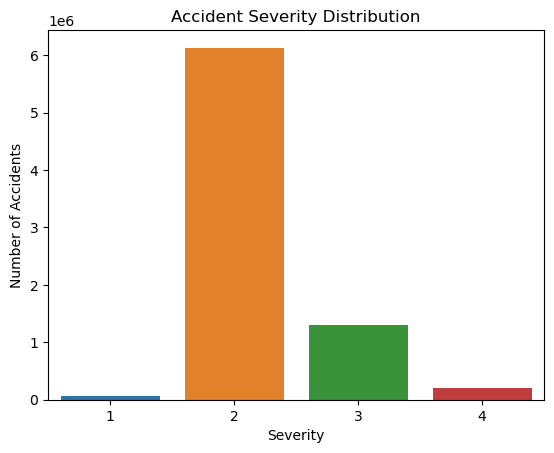

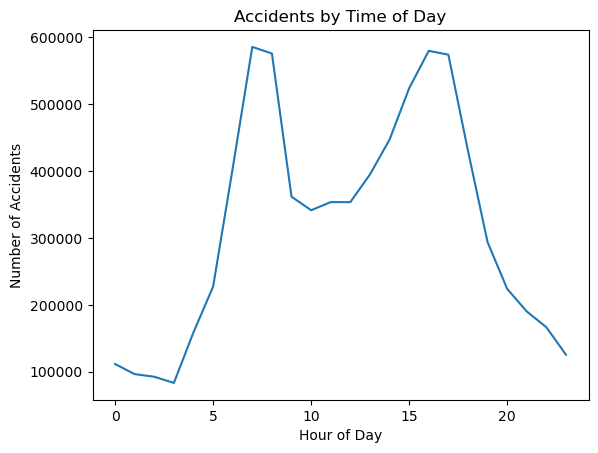

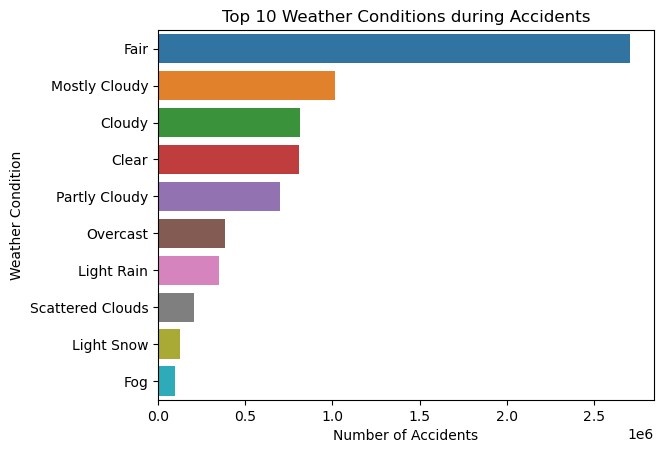

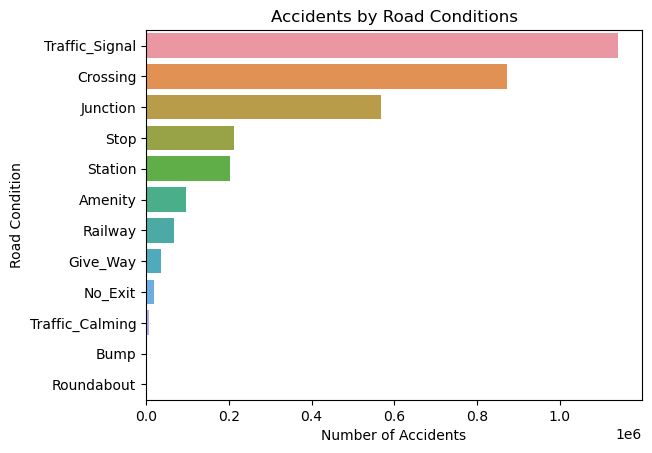

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Analyze patterns related to severity
severity_count = data['Severity'].value_counts()
sns.barplot(x=severity_count.index, y=severity_count.values)
plt.title('Accident Severity Distribution')
plt.xlabel('Severity')
plt.ylabel('Number of Accidents')
plt.show()

# Analyze accidents by time of day
data['Start_Time'] = pd.to_datetime(data['Start_Time'])
data['Hour'] = data['Start_Time'].dt.hour
hourly_accidents = data['Hour'].value_counts().sort_index()
sns.lineplot(x=hourly_accidents.index, y=hourly_accidents.values)
plt.title('Accidents by Time of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Accidents')
plt.show()

# Analyze accidents by weather conditions
weather_count = data['Weather_Condition'].value_counts().head(10)
sns.barplot(y=weather_count.index, x=weather_count.values)
plt.title('Top 10 Weather Conditions during Accidents')
plt.xlabel('Number of Accidents')
plt.ylabel('Weather Condition')
plt.show()

# Analyze accidents by road conditions
road_conditions = ['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit',
                   'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal']
road_condition_counts = data[road_conditions].sum().sort_values(ascending=False)
sns.barplot(y=road_condition_counts.index, x=road_condition_counts.values)
plt.title('Accidents by Road Conditions')
plt.xlabel('Number of Accidents')
plt.ylabel('Road Condition')
plt.show()


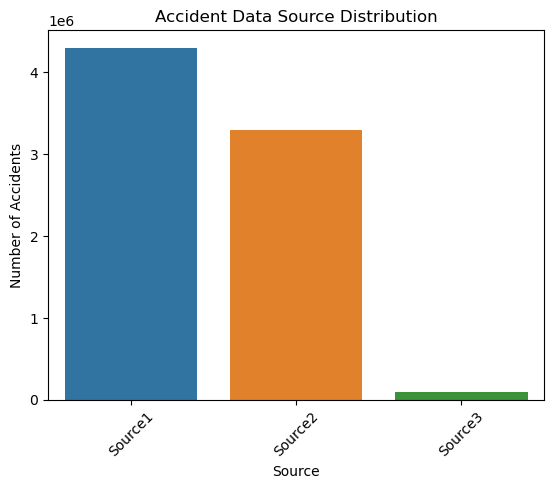

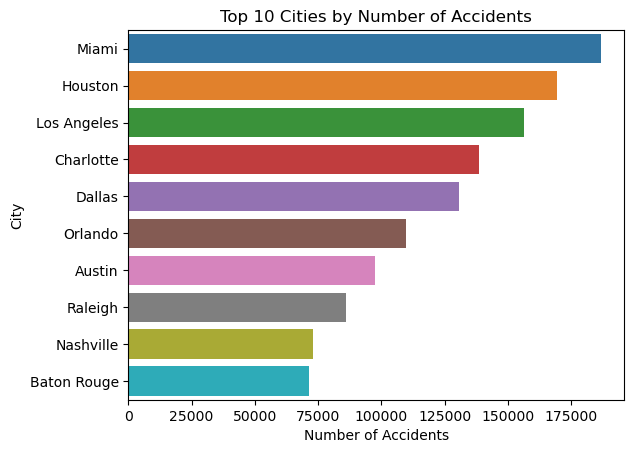

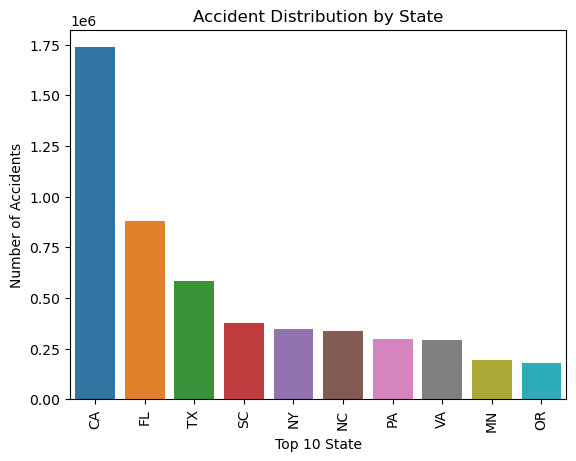

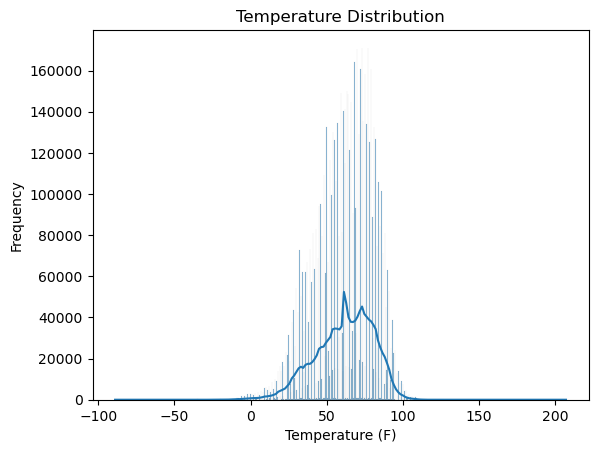

In [15]:
# Analyze patterns related to data source
source_count = data['Source'].value_counts()
sns.barplot(x=source_count.index, y=source_count.values)
plt.title('Accident Data Source Distribution')
plt.xlabel('Source')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

# Analyze patterns related to city (Top 20 Cities)
city_count = data['City'].value_counts().head(10)
sns.barplot(y=city_count.index, x=city_count.values)
plt.title('Top 10 Cities by Number of Accidents')
plt.xlabel('Number of Accidents')
plt.ylabel('City')
plt.show()

# Analyze patterns related to state
state_count = data['State'].value_counts().head(10)
sns.barplot(x=state_count.index, y=state_count.values)
plt.title('Accident Distribution by State')
plt.xlabel('Top 10 State')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=90)
plt.show()

# Analyze patterns related to temperature
sns.histplot(data['Temperature(F)'].dropna(), kde=True)
plt.title('Temperature Distribution')
plt.xlabel('Temperature (F)')
plt.ylabel('Frequency')
plt.show()


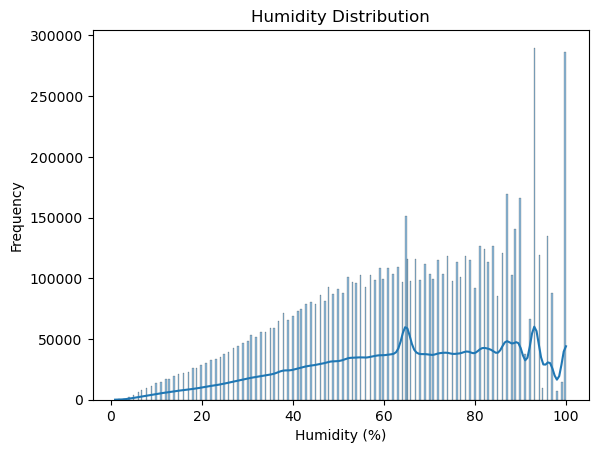

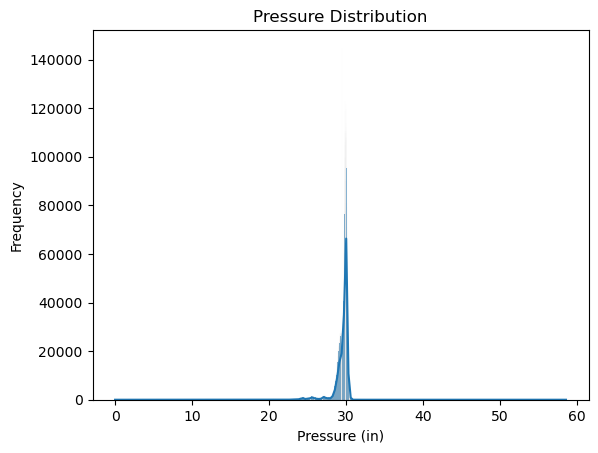

In [19]:
# Analyze patterns related to humidity
sns.histplot(data['Humidity(%)'].dropna(), kde=True)
plt.title('Humidity Distribution')
plt.xlabel('Humidity (%)')
plt.ylabel('Frequency')
plt.show()

# Analyze patterns related to pressure
sns.histplot(data['Pressure(in)'].dropna(), kde=True)
plt.title('Pressure Distribution')
plt.xlabel('Pressure (in)')
plt.ylabel('Frequency')
plt.show()


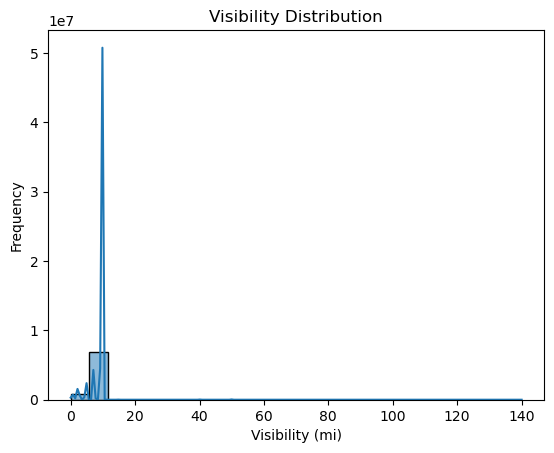

In [21]:
# Analyze patterns related to visibility
sns.histplot(data['Visibility(mi)'].dropna(), kde=True)
plt.title('Visibility Distribution')
plt.xlabel('Visibility (mi)')
plt.ylabel('Frequency')
plt.show()


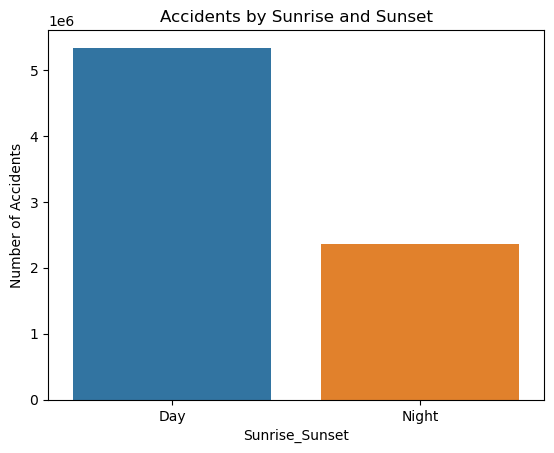

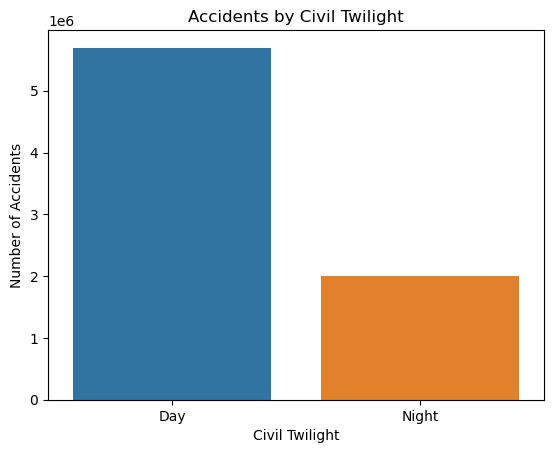

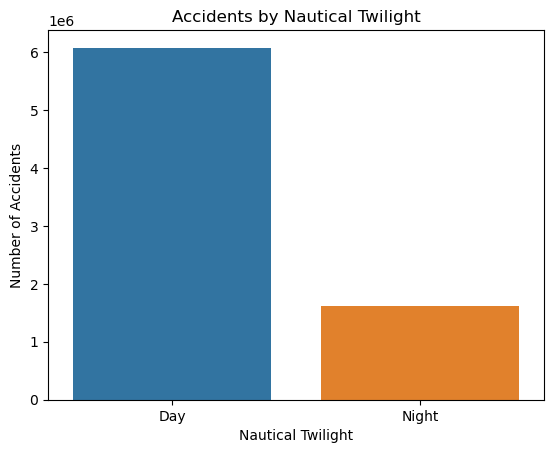

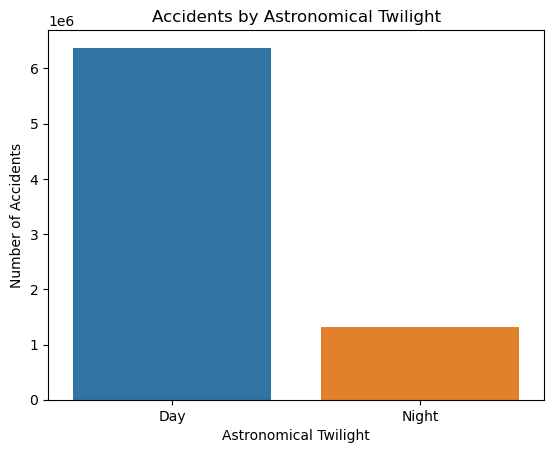

In [27]:
# Analyze patterns related to sunrise and sunset times
sunrise_sunset_count = data['Sunrise_Sunset'].value_counts()
sns.barplot(x=sunrise_sunset_count.index, y=sunrise_sunset_count.values)
plt.title('Accidents by Sunrise and Sunset')
plt.xlabel('Sunrise_Sunset')
plt.ylabel('Number of Accidents')
plt.show()

# Analyze patterns related to civil twilight times
civil_twilight_count = data['Civil_Twilight'].value_counts()
sns.barplot(x=civil_twilight_count.index, y=civil_twilight_count.values)
plt.title('Accidents by Civil Twilight')
plt.xlabel('Civil Twilight')
plt.ylabel('Number of Accidents')
plt.show()

# Analyze patterns related to nautical twilight times
nautical_twilight_count = data['Nautical_Twilight'].value_counts()
sns.barplot(x=nautical_twilight_count.index, y=nautical_twilight_count.values)
plt.title('Accidents by Nautical Twilight')
plt.xlabel('Nautical Twilight')
plt.ylabel('Number of Accidents')
plt.show()


# Analyze patterns related to astronomical twilight times
astronomical_twilight_count = data['Astronomical_Twilight'].value_counts()
sns.barplot(x=astronomical_twilight_count.index, y=astronomical_twilight_count.values)
plt.title('Accidents by Astronomical Twilight')
plt.xlabel('Astronomical Twilight')
plt.ylabel('Number of Accidents')
plt.show()


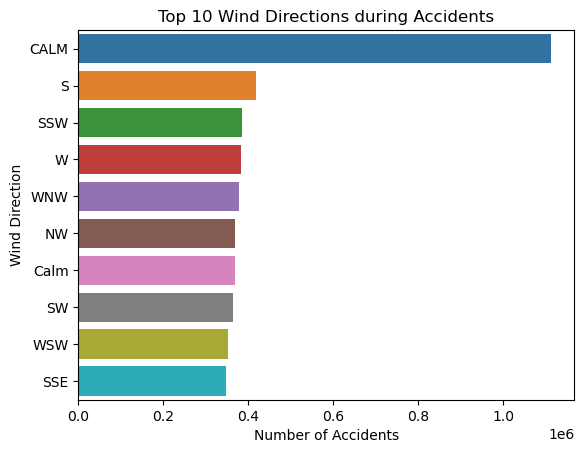

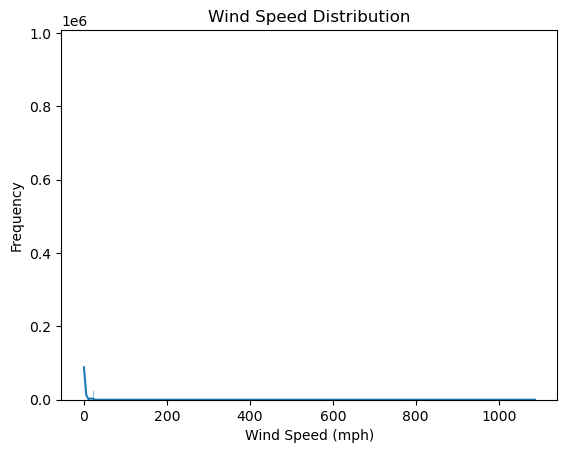

In [29]:
# Analyze patterns related to wind direction
wind_direction_count = data['Wind_Direction'].value_counts().head(10)
sns.barplot(y=wind_direction_count.index, x=wind_direction_count.values)
plt.title('Top 10 Wind Directions during Accidents')
plt.xlabel('Number of Accidents')
plt.ylabel('Wind Direction')
plt.show()

# Analyze patterns related to wind speed
sns.histplot(data['Wind_Speed(mph)'].dropna(), kde=True)
plt.title('Wind Speed Distribution')
plt.xlabel('Wind Speed (mph)')
plt.ylabel('Frequency')
plt.show()


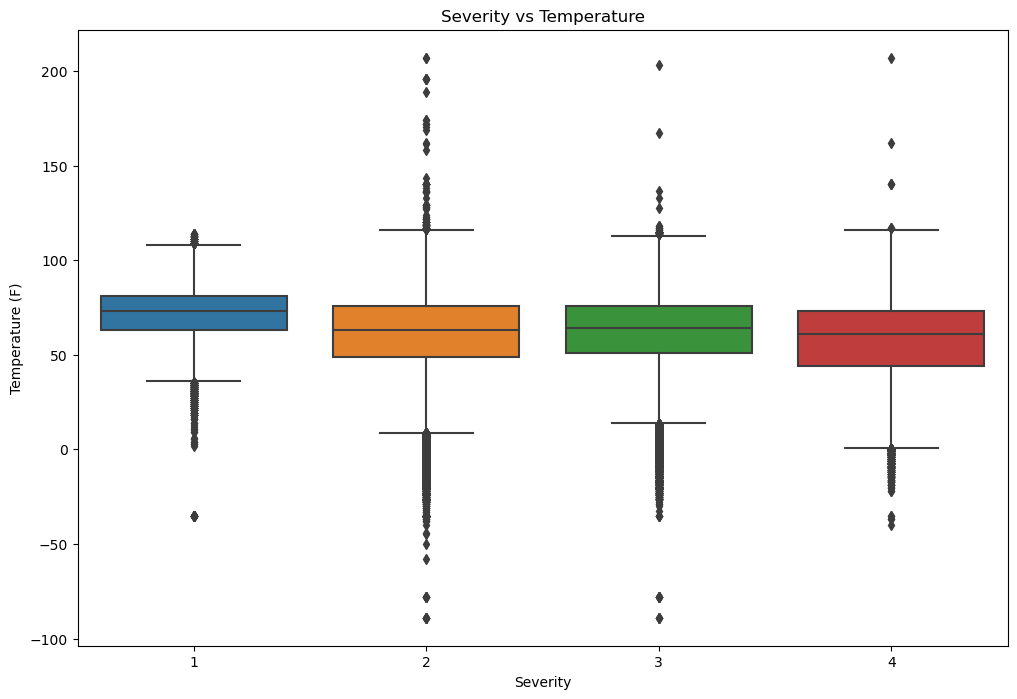

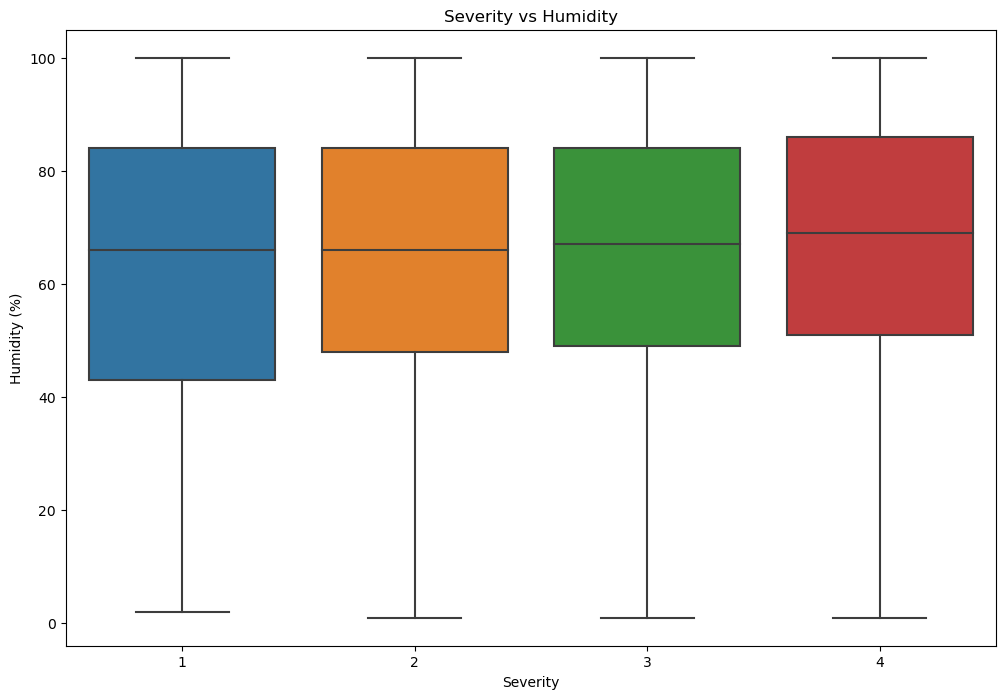

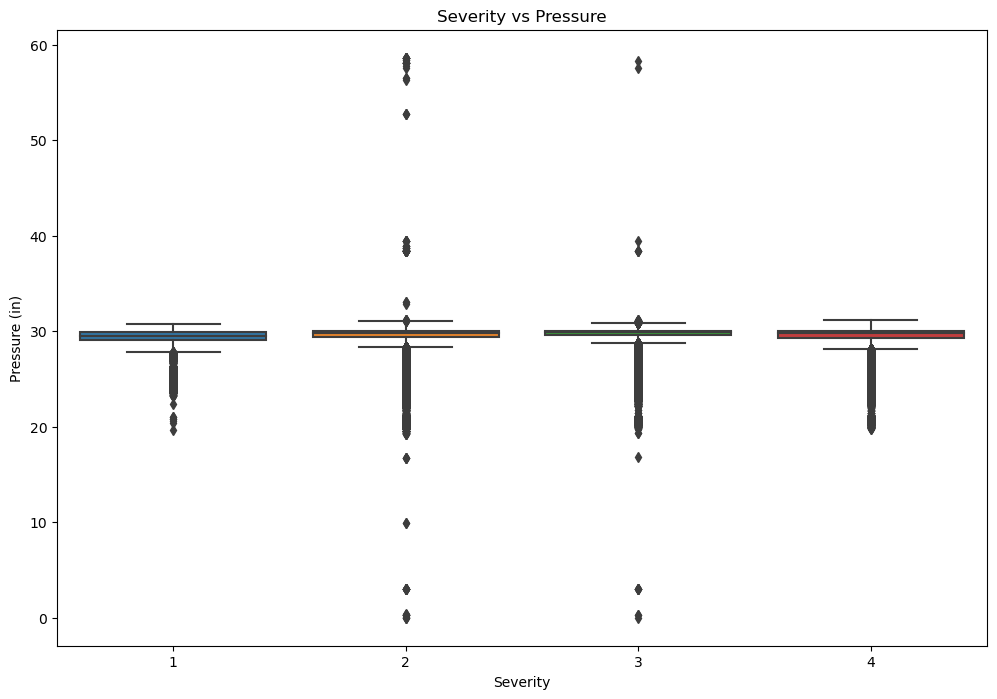

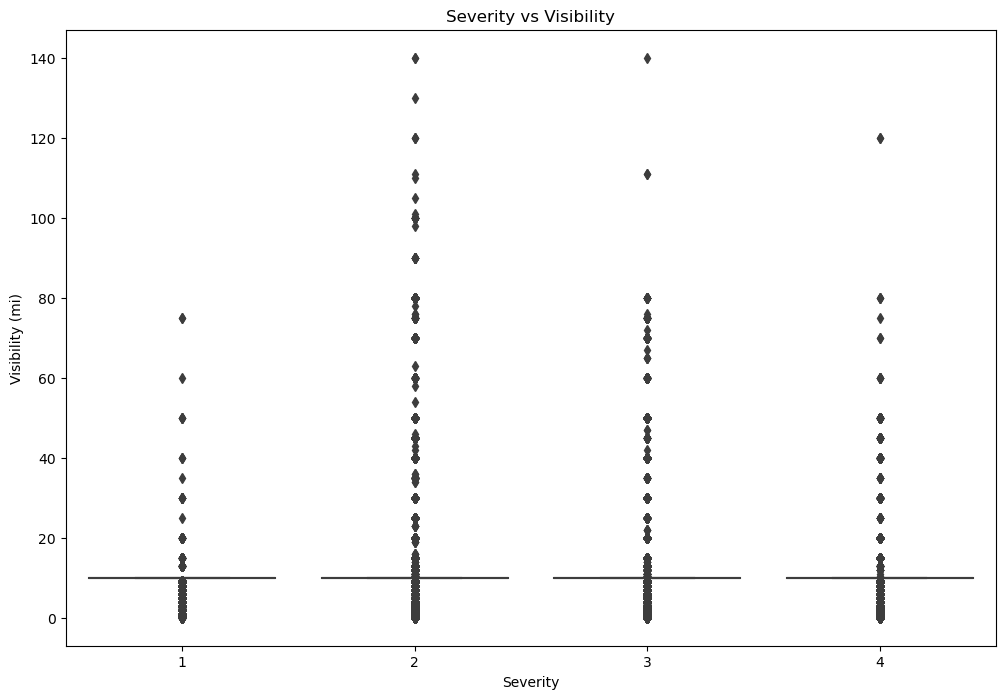

In [36]:
# Analyze the relationship between severity and weather condition
plt.figure(figsize=(12, 8))
sns.boxplot(x='Severity', y='Temperature(F)', data=data)
plt.title('Severity vs Temperature')
plt.xlabel('Severity')
plt.ylabel('Temperature (F)')
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(x='Severity', y='Humidity(%)', data=data)
plt.title('Severity vs Humidity')
plt.xlabel('Severity')
plt.ylabel('Humidity (%)')
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(x='Severity', y='Pressure(in)', data=data)
plt.title('Severity vs Pressure')
plt.xlabel('Severity')
plt.ylabel('Pressure (in)')
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(x='Severity', y='Visibility(mi)', data=data)
plt.title('Severity vs Visibility')
plt.xlabel('Severity')
plt.ylabel('Visibility (mi)')
plt.show()



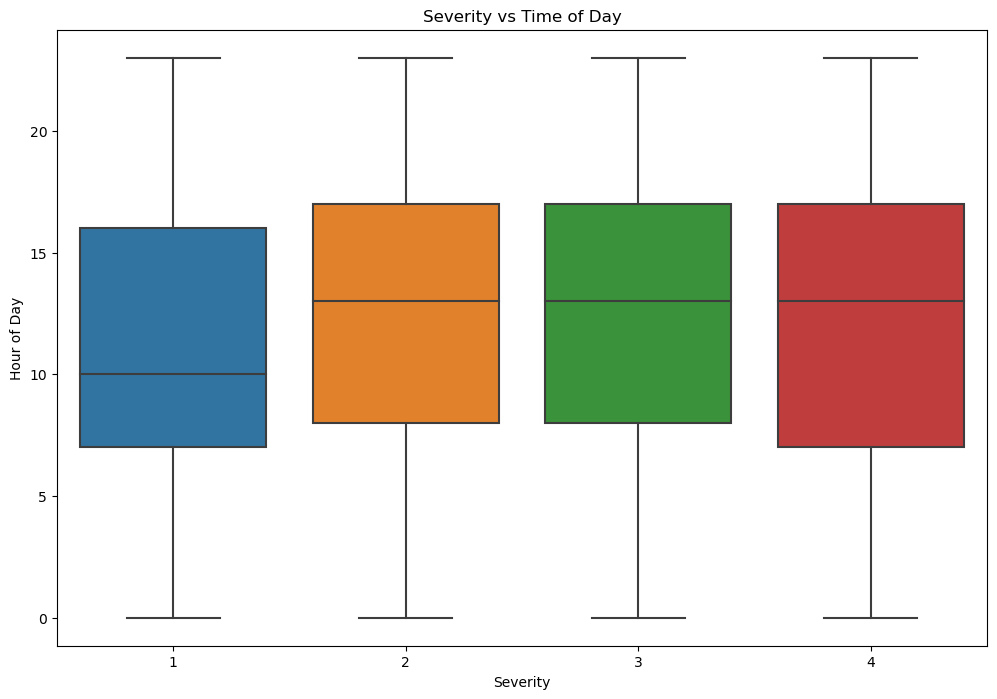

In [44]:
# Analyze the relationship between severity and time of day
plt.figure(figsize=(12, 8))
sns.boxplot(x='Severity', y='Hour', data=data)
plt.title('Severity vs Time of Day')
plt.xlabel('Severity')
plt.ylabel('Hour of Day')
plt.show()


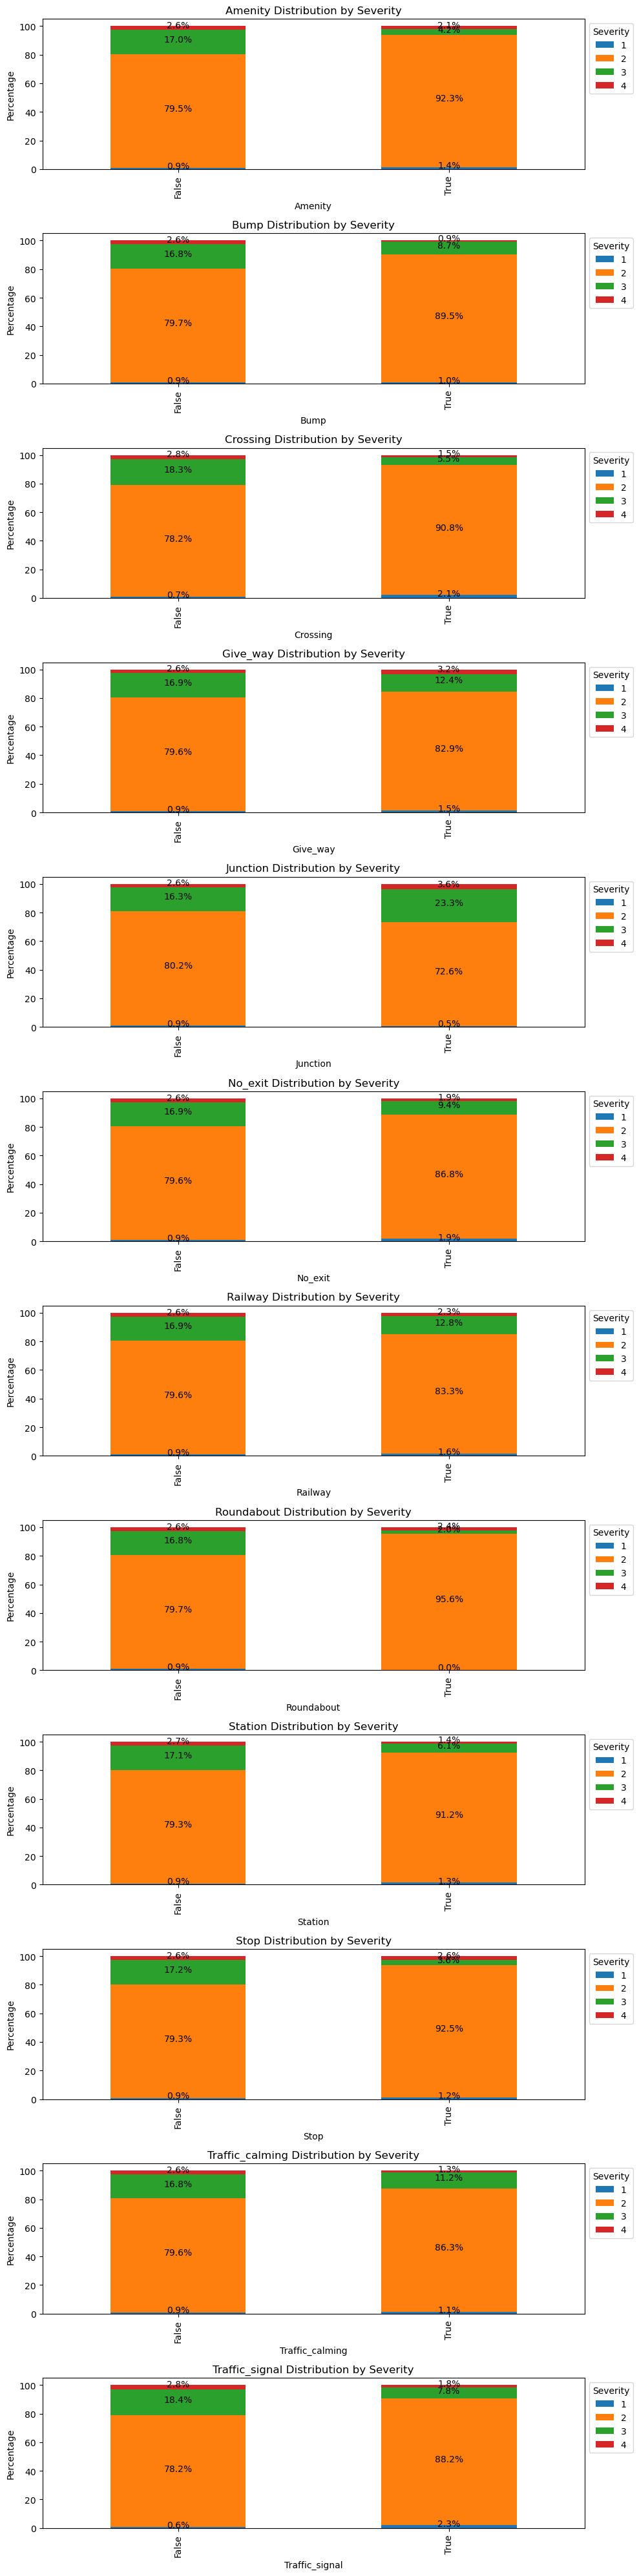

In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Analyze the relationship between severity and road conditions
road_conditions = ['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit',
                   'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal']

# Create subplots
fig, axes = plt.subplots(nrows=len(road_conditions), ncols=1, figsize=(10, 40))

# Calculate the count and ratio for each attribute and Severity combination
for i, attribute in enumerate(road_conditions):
    percentData = data.groupby([attribute, 'Severity']).size().reset_index(name='n')
    percentData['ratio'] = percentData.groupby(attribute)['n'].apply(lambda x: 100 * x / x.sum())

    # Create the stacked bar chart with percentage labels
    bar_plot = percentData.pivot(index=attribute, columns='Severity', values='ratio').plot.bar(
        stacked=True, ax=axes[i]
    )

    for container in axes[i].containers:
        labels = [f'{v.get_height():.1f}%' for v in container]
        axes[i].bar_label(container, labels=labels, label_type='center', padding=3)

    # Set the axis titles and legend
    axes[i].set_title(f'{attribute.capitalize()} Distribution by Severity')
    axes[i].set_xlabel(attribute.capitalize())
    axes[i].set_ylabel('Percentage')
    handles, _ = axes[i].get_legend_handles_labels()
    labels = percentData['Severity'].unique()
    axes[i].legend(handles, labels, title='Severity', bbox_to_anchor=(1, 1), loc='upper left')

# Adjust layout
plt.tight_layout()
plt.show()


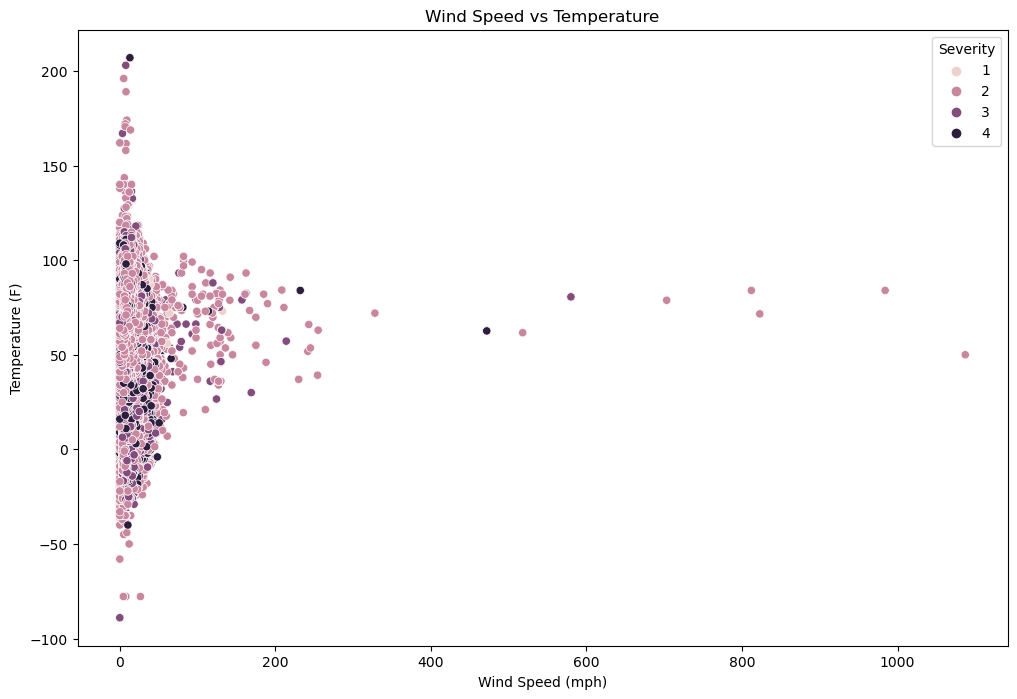

In [50]:
# Analyze the relationship between wind speed and temperature
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Wind_Speed(mph)', y='Temperature(F)', hue='Severity', data=data)
plt.title('Wind Speed vs Temperature')
plt.xlabel('Wind Speed (mph)')
plt.ylabel('Temperature (F)')
plt.legend(title='Severity', loc='upper right')
plt.show()


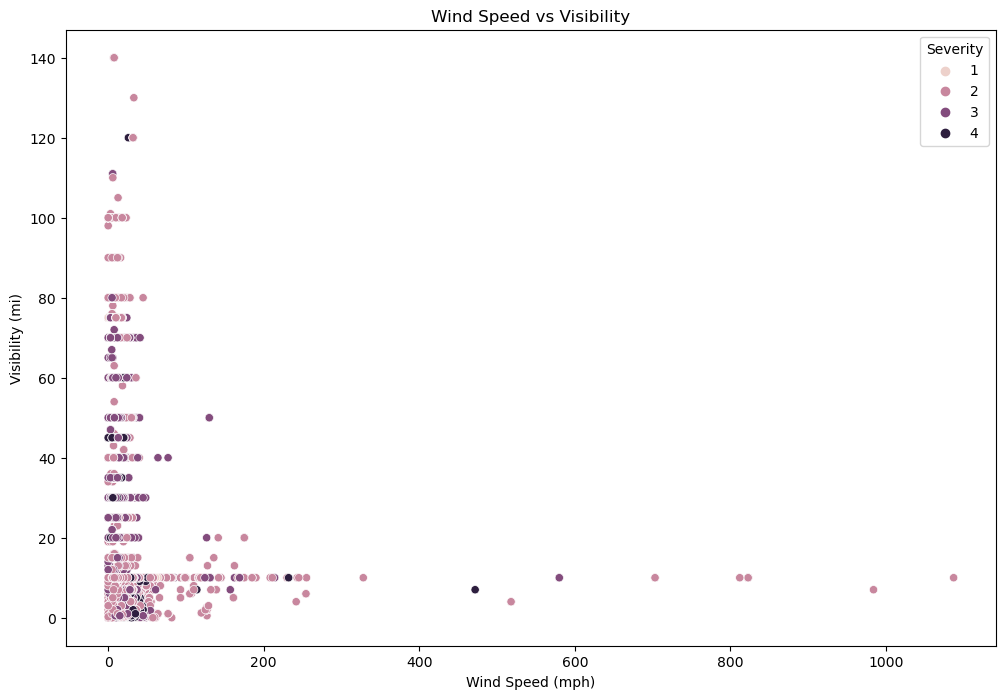

In [48]:
# Analyze the relationship between wind speed and visibility
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Wind_Speed(mph)', y='Visibility(mi)', hue='Severity', data=data)
plt.title('Wind Speed vs Visibility')
plt.xlabel('Wind Speed (mph)')
plt.ylabel('Visibility (mi)')
plt.legend(title='Severity', loc='upper right')
plt.show()


In [12]:
!pip install cartopy


Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 10.9/10.9 MB 2.4 MB/s eta 0:00:00
     -------------------------------------- 46.5/46.5 kB 772.3 kB/s eta 0:00:00


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


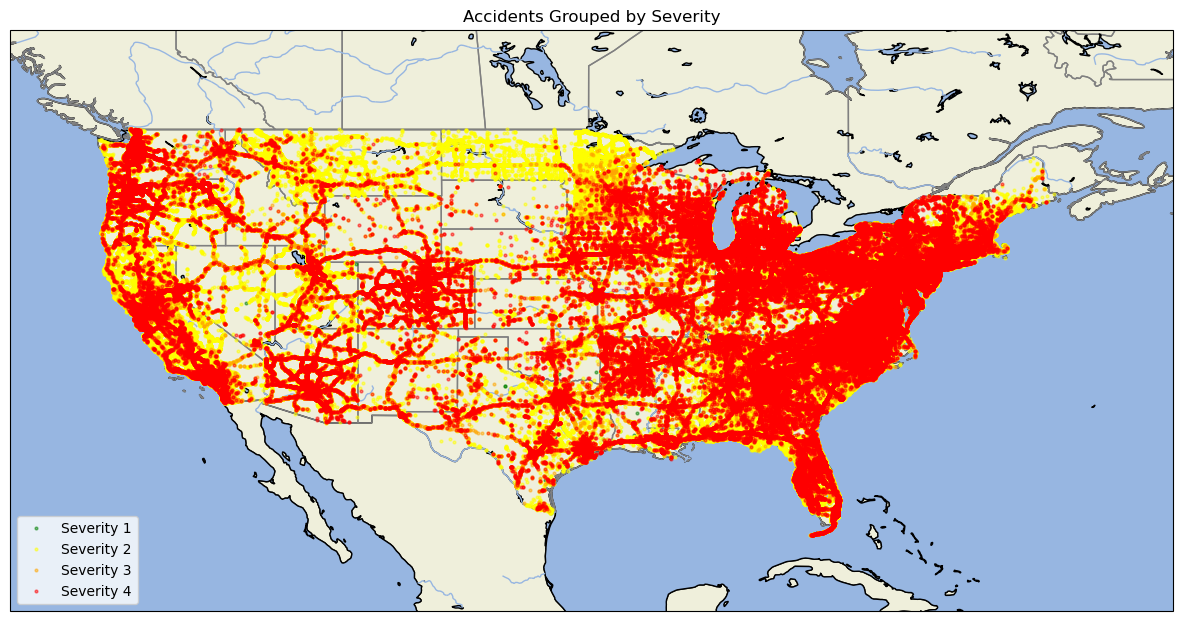

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Assuming data_cleaned is your cleaned dataset

# Filter out rows with missing latitude or longitude
data = data.dropna(subset=['Start_Lat', 'Start_Lng'])

# Define the severity colors
severity_colors = {
    1: 'green',
    2: 'yellow',
    3: 'orange',
    4: 'red'
}

# Create the plot
fig = plt.figure(figsize=(15, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-130, -60, 20, 55], crs=ccrs.PlateCarree())  # Set map extent to cover the USA

# Add map features
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.STATES, edgecolor='gray')
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAKES, edgecolor='black')
ax.add_feature(cfeature.RIVERS)

# Plot each severity level
for severity, color in severity_colors.items():
    subset = data[data['Severity'] == severity]
    ax.plot(subset['Start_Lng'], subset['Start_Lat'], 'o', markersize=2, color=color, label=f'Severity {severity}', alpha=0.5)

# Add legend
plt.legend(loc='lower left')

# Add a title
plt.title('Accidents Grouped by Severity')

# Show the plot
plt.show()


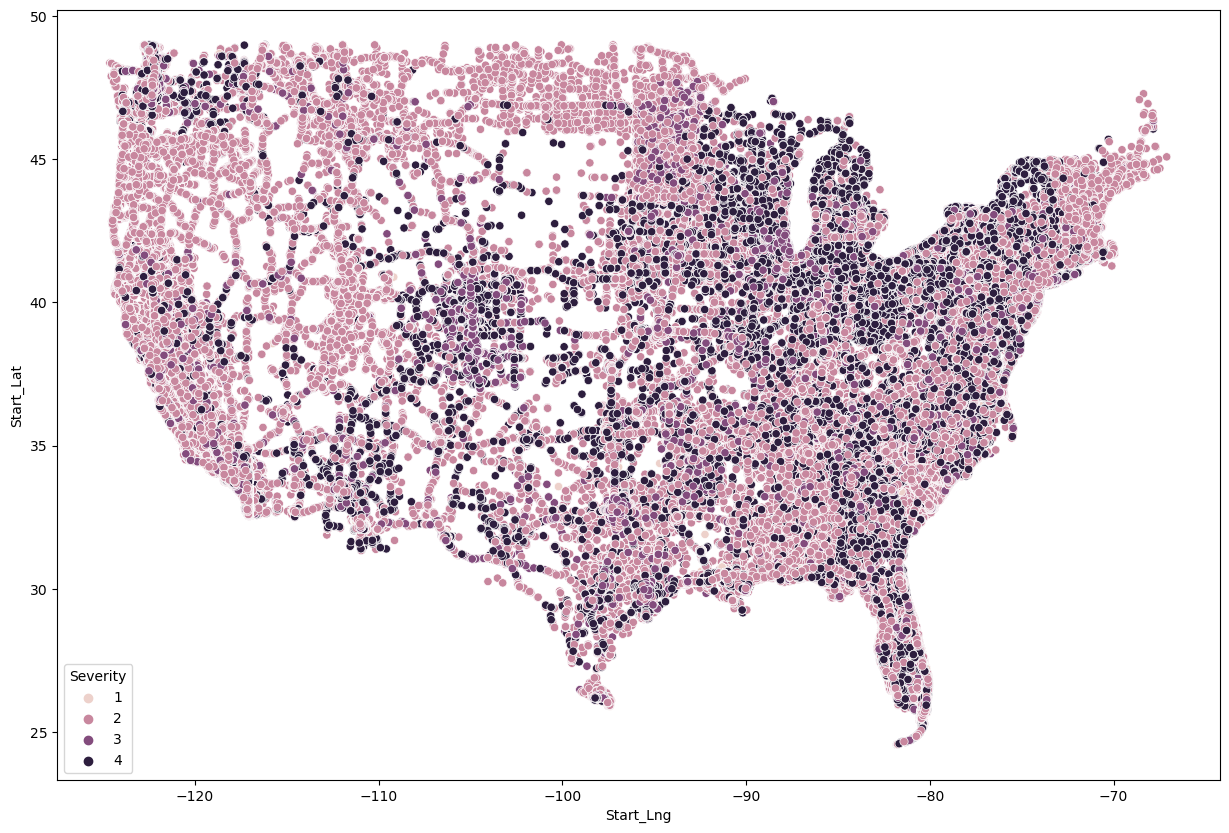

In [16]:
plt.figure(figsize=(15,10))
sns.scatterplot(x=data['Start_Lng'],y=data['Start_Lat'],hue=data['Severity'])
plt.show()

In [ ]:
import folium
from folium.plugins import HeatMap

# Create a map centered around the median location
m = folium.Map(location=[data['Start_Lat'].median(), data['Start_Lng'].median()], zoom_start=5)

# Add a heatmap of accident locations
heat_data = [[row['Start_Lat'], row['Start_Lng']] for index, row in data.iterrows()]
HeatMap(heat_data).add_to(m)

# Save and display the map
m.save('accident_heatmap.html')
m
